In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, RobustScaler

In [5]:
LABELS =["Normal","Fraud"]

In [6]:
#import the dataset using pandas
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df= data.sample(frac=0.1,random_state=1)

49
28432


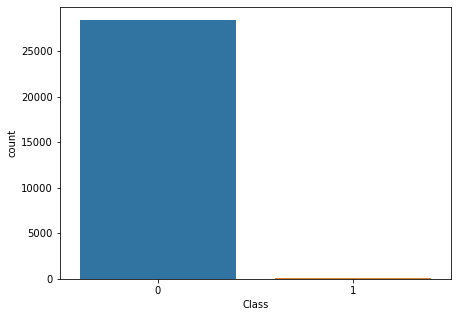

0.0017204452090867595


In [7]:
#determine number of fraud cases in dataset (plotting distribution of class)
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]
print(len(fraud))
print(len(non_fraud))
plt.figure(figsize=(7,5))
figure = sns.countplot(x="Class", data=df)
plt.show()

print(float(len(fraud)/len(df['Class'])))

In [8]:
#description of dataset.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,...,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,94705.035216,-0.001143,-0.018290,0.000795,0.000350,-0.015666,0.003634,-0.008523,-0.003040,0.014536,...,0.004740,0.006719,-0.000494,-0.002626,-0.000917,0.004762,-0.001689,-0.004154,89.957884,0.001720
std,47584.727034,1.994661,1.709050,1.522313,1.420003,1.395552,1.334985,1.237249,1.204102,1.098006,...,0.744743,0.728209,0.645945,0.603968,0.520679,0.488171,0.418304,0.321646,270.894630,0.041443
min,0.000000,-40.470142,-63.344698,-31.813586,-5.266509,-42.147898,-19.996349,-22.291962,-33.785407,-8.739670,...,-16.640785,-10.933144,-30.269720,-2.752263,-7.025783,-2.534330,-8.260909,-9.617915,0.000000,0.000000
25%,53924.000000,-0.908809,-0.610322,-0.892884,-0.847370,-0.703986,-0.765807,-0.562033,-0.208445,-0.632488,...,-0.224842,-0.535877,-0.163047,-0.360582,-0.319611,-0.328476,-0.071712,-0.053379,5.980000,0.000000
50%,84551.000000,0.031139,0.051775,0.178943,-0.017692,-0.068037,-0.269071,0.028378,0.024696,-0.037100,...,-0.029075,0.014337,-0.012678,0.038383,0.015231,-0.049750,0.000914,0.010753,22.350000,0.000000
75%,139392.000000,1.320048,0.792685,1.035197,0.737312,0.603574,0.398839,0.559428,0.326057,0.621093,...,0.189068,0.533936,0.148065,0.434851,0.351466,0.253580,0.090329,0.076267,78.930000,0.000000
max,172784.000000,2.411499,17.418649,4.069865,16.715537,28.762671,22.529298,36.677268,19.587773,8.141560,...,22.588989,6.090514,15.626067,3.944520,5.541598,3.118588,11.135740,15.373170,19656.530000,1.000000


In [9]:
# scaling the unscaled Timp and amount column
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,...,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,-0.001143,-0.018290,0.000795,0.000350,-0.015666,0.003634,-0.008523,-0.003040,0.014536,-0.000087,...,0.006719,-0.000494,-0.002626,-0.000917,0.004762,-0.001689,-0.004154,0.001720,0.926770,0.118805
std,1.994661,1.709050,1.522313,1.420003,1.395552,1.334985,1.237249,1.204102,1.098006,1.079336,...,0.728209,0.645945,0.603968,0.520679,0.488171,0.418304,0.321646,0.041443,3.713429,0.556755
min,-40.470142,-63.344698,-31.813586,-5.266509,-42.147898,-19.996349,-22.291962,-33.785407,-8.739670,-18.271168,...,-10.933144,-30.269720,-2.752263,-7.025783,-2.534330,-8.260909,-9.617915,0.000000,-0.306374,-0.989271
25%,-0.908809,-0.610322,-0.892884,-0.847370,-0.703986,-0.765807,-0.562033,-0.208445,-0.632488,-0.537540,...,-0.535877,-0.163047,-0.360582,-0.319611,-0.328476,-0.071712,-0.053379,0.000000,-0.224400,-0.358345
50%,0.031139,0.051775,0.178943,-0.017692,-0.068037,-0.269071,0.028378,0.024696,-0.037100,-0.092191,...,0.014337,-0.012678,0.038383,0.015231,-0.049750,0.000914,0.010753,0.000000,0.000000,0.000000
75%,1.320048,0.792685,1.035197,0.737312,0.603574,0.398839,0.559428,0.326057,0.621093,0.463517,...,0.533936,0.148065,0.434851,0.351466,0.253580,0.090329,0.076267,0.000000,0.775600,0.641655
max,2.411499,17.418649,4.069865,16.715537,28.762671,22.529298,36.677268,19.587773,8.141560,12.901627,...,6.090514,15.626067,3.944520,5.541598,3.118588,11.135740,15.373170,1.000000,269.145716,1.032351


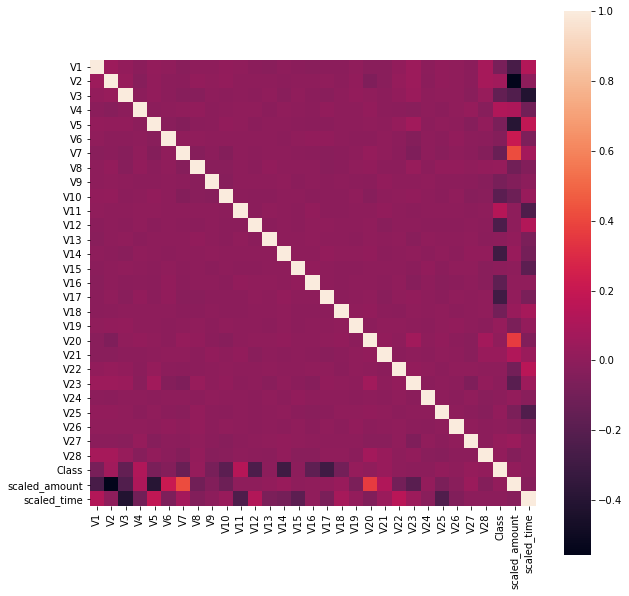

In [11]:
# Figure out correlations, plot correlation matrix:
corr_mat = df.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(corr_mat, square = True)

In [12]:
# Here we are splitting our dataset into Inliers(Non_Fraud) and Outliers(Fraud) cases, We are also dropping 'Class' column from out dataset for unsupervised learining.
inliers = df[df.Class==0]
inliers = inliers.drop(['Class'], axis=1)
outliers = df[df.Class==1]
outlier_class=outliers['Class']
outliers = outliers.drop(['Class'], axis=1)

In [ ]:
# the predictions of LOF and Isolation forest is -1(fraud) and 1(non-fraud).
#changing this to the format used in given dataset(0 for non fraud and 1 for fraud)
def reformat(y):
    y[y==1]= 0
    y[y == -1] = 1
    return y

In [13]:
inliers_train, inliers_test = train_test_split(inliers, test_size=0.15)
train, val = train_test_split(inliers_train, test_size=0.15)

In [ ]:
# Using non-fraud cases to train using Isolation Forest. testing and further applying the model on fraud cases.

model = IsolationForest()
model.fit(inliers_train)
pred_test_IF = model.predict(inliers_test)
pred_test_IF = reformat(pred_test_IF)
outlier_pred_IF = model.predict(outliers)
outlier_pred_IF = reformat(outlier_pred_IF)

In [ ]:
# Using non-fraud cases to train using LOF. Testing and further applying the model on fraud cases.

model = LocalOutlierFactor(novelty=True)
model.fit(inliers_train)
pred_test_LOF = model.predict(inliers_test)
pred_test_LOF = reformat(pred_test_LOF)
outlier_pred_LOF = model.predict(outliers)
outlier_pred_LOF = reformat(outlier_pred_LOF)

In [ ]:
# printing the accuracy score and the classification reporabst
print('Isolation forest(accuracy score):{}'.format(accuracy_score(outlier_class,outlier_pred_IF)))
print('Isolation forest(classification report):\n{}'.format(classification_report(outlier_class,outlier_pred_IF, zero_division=0)))
conf_matrix_IF = confusion_matrix(outlier_class,outlier_pred_IF)
sns.heatmap(conf_matrix_IF, xticklabels=LABELS,yticklabels=LABELS, annot= True, fmt='d')
plt.title('Confusion Matrix for Isolation Forest')
plt.ylabel('True class')
plt.xlabel('Predicted Class')
plt.show() 
print('LocalOutlierFactor(accuracy score):{}'.format(accuracy_score(outlier_class,outlier_pred_LOF)))
print('Isolation forest(classification report):\n{}'.format(classification_report(outlier_class,outlier_pred_LOF, zero_division =0)))
conf_matrix_LOF = confusion_matrix(outlier_class,outlier_pred_LOF)
sns.heatmap(conf_matrix_LOF, xticklabels=LABELS,yticklabels=LABELS, annot= True, fmt='d')
plt.title('Confusion Matrix for Local Outlier Factor')
plt.ylabel('True class')
plt.xlabel('Predicted Class')
plt.show() 

In [14]:
import keras
import tensorflow
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
np.random.seed(42)

In [15]:
x = train
y= val
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
#model.add(Dense(10, activation='relu')) 
model.add(Dense(10,activation = 'relu')) # size to compress to
#model.add(Dense(10, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(x.shape[1])) # Multiple output neurons


model.compile(Adam(lr=0.0001), loss='mse')

history= model.fit(x,x,
                epochs=500,
                verbose=2,
                batch_size=100,
                validation_data= (y,y)).history





Epoch 1/500
206/206 - 1s - loss: 1.4665 - val_loss: 1.4513
Epoch 2/500
206/206 - 0s - loss: 1.3442 - val_loss: 1.2903
Epoch 3/500
206/206 - 0s - loss: 1.1449 - val_loss: 1.0375
Epoch 4/500
206/206 - 0s - loss: 0.9124 - val_loss: 0.8085
Epoch 5/500
206/206 - 0s - loss: 0.7366 - val_loss: 0.6643
Epoch 6/500
206/206 - 0s - loss: 0.6328 - val_loss: 0.5886
Epoch 7/500
206/206 - 0s - loss: 0.5716 - val_loss: 0.5384
Epoch 8/500
206/206 - 0s - loss: 0.5269 - val_loss: 0.5001
Epoch 9/500
206/206 - 0s - loss: 0.4916 - val_loss: 0.4683
Epoch 10/500
206/206 - 0s - loss: 0.4616 - val_loss: 0.4415
Epoch 11/500
206/206 - 0s - loss: 0.4369 - val_loss: 0.4193
Epoch 12/500
206/206 - 0s - loss: 0.4161 - val_loss: 0.4011
Epoch 13/500
206/206 - 0s - loss: 0.3993 - val_loss: 0.3869
Epoch 14/500
206/206 - 0s - loss: 0.3861 - val_loss: 0.3749
Epoch 15/500
206/206 - 0s - loss: 0.3742 - val_loss: 0.3643
Epoch 16/500
206/206 - 0s - loss: 0.3636 - val_loss: 0.3552
Epoch 17/500
206/206 - 0s - loss: 0.3546 - val_lo

206/206 - 0s - loss: 0.1289 - val_loss: 0.1311
Epoch 138/500
206/206 - 0s - loss: 0.1288 - val_loss: 0.1313
Epoch 139/500
206/206 - 0s - loss: 0.1283 - val_loss: 0.1308
Epoch 140/500
206/206 - 0s - loss: 0.1279 - val_loss: 0.1299
Epoch 141/500
206/206 - 0s - loss: 0.1275 - val_loss: 0.1302
Epoch 142/500
206/206 - 0s - loss: 0.1271 - val_loss: 0.1302
Epoch 143/500
206/206 - 0s - loss: 0.1270 - val_loss: 0.1292
Epoch 144/500
206/206 - 0s - loss: 0.1265 - val_loss: 0.1290
Epoch 145/500
206/206 - 0s - loss: 0.1263 - val_loss: 0.1287
Epoch 146/500
206/206 - 0s - loss: 0.1259 - val_loss: 0.1281
Epoch 147/500
206/206 - 0s - loss: 0.1256 - val_loss: 0.1288
Epoch 148/500
206/206 - 0s - loss: 0.1253 - val_loss: 0.1274
Epoch 149/500
206/206 - 0s - loss: 0.1248 - val_loss: 0.1274
Epoch 150/500
206/206 - 0s - loss: 0.1246 - val_loss: 0.1301
Epoch 151/500
206/206 - 0s - loss: 0.1245 - val_loss: 0.1268
Epoch 152/500
206/206 - 0s - loss: 0.1239 - val_loss: 0.1266
Epoch 153/500
206/206 - 0s - loss: 0.1

Epoch 272/500
206/206 - 0s - loss: 0.1008 - val_loss: 0.1063
Epoch 273/500
206/206 - 0s - loss: 0.1007 - val_loss: 0.1062
Epoch 274/500
206/206 - 1s - loss: 0.1005 - val_loss: 0.1067
Epoch 275/500
206/206 - 0s - loss: 0.1004 - val_loss: 0.1060
Epoch 276/500
206/206 - 0s - loss: 0.1003 - val_loss: 0.1059
Epoch 277/500
206/206 - 0s - loss: 0.1000 - val_loss: 0.1060
Epoch 278/500
206/206 - 1s - loss: 0.0999 - val_loss: 0.1059
Epoch 279/500
206/206 - 0s - loss: 0.0998 - val_loss: 0.1061
Epoch 280/500
206/206 - 0s - loss: 0.0999 - val_loss: 0.1054
Epoch 281/500
206/206 - 0s - loss: 0.0996 - val_loss: 0.1065
Epoch 282/500
206/206 - 1s - loss: 0.0994 - val_loss: 0.1057
Epoch 283/500
206/206 - 1s - loss: 0.0993 - val_loss: 0.1056
Epoch 284/500
206/206 - 1s - loss: 0.0992 - val_loss: 0.1058
Epoch 285/500
206/206 - 0s - loss: 0.0991 - val_loss: 0.1064
Epoch 286/500
206/206 - 0s - loss: 0.0990 - val_loss: 0.1051
Epoch 287/500
206/206 - 0s - loss: 0.0989 - val_loss: 0.1045
Epoch 288/500
206/206 - 

Epoch 407/500
206/206 - 0s - loss: 0.0862 - val_loss: 0.0936
Epoch 408/500
206/206 - 0s - loss: 0.0862 - val_loss: 0.0940
Epoch 409/500
206/206 - 0s - loss: 0.0860 - val_loss: 0.0935
Epoch 410/500
206/206 - 0s - loss: 0.0859 - val_loss: 0.0940
Epoch 411/500
206/206 - 0s - loss: 0.0859 - val_loss: 0.0936
Epoch 412/500
206/206 - 0s - loss: 0.0859 - val_loss: 0.0938
Epoch 413/500
206/206 - 0s - loss: 0.0859 - val_loss: 0.0942
Epoch 414/500
206/206 - 0s - loss: 0.0857 - val_loss: 0.0931
Epoch 415/500
206/206 - 0s - loss: 0.0855 - val_loss: 0.0930
Epoch 416/500
206/206 - 0s - loss: 0.0855 - val_loss: 0.0934
Epoch 417/500
206/206 - 0s - loss: 0.0853 - val_loss: 0.0938
Epoch 418/500
206/206 - 0s - loss: 0.0855 - val_loss: 0.0927
Epoch 419/500
206/206 - 0s - loss: 0.0851 - val_loss: 0.0932
Epoch 420/500
206/206 - 0s - loss: 0.0851 - val_loss: 0.0930
Epoch 421/500
206/206 - 0s - loss: 0.0850 - val_loss: 0.0936
Epoch 422/500
206/206 - 0s - loss: 0.0853 - val_loss: 0.0920
Epoch 423/500
206/206 - 

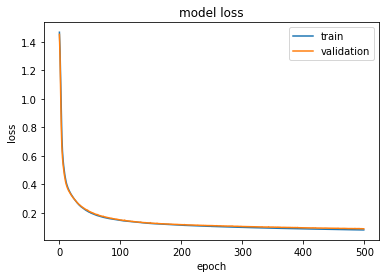

In [16]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right');

In [17]:
predn= model.predict(inliers_test)
score= (sklearn.metrics.mean_squared_error(predn,inliers_test))
predn_outlier = model.predict(outliers)
score_outlier = np.sqrt(sklearn.metrics.mean_squared_error(predn_outlier,outliers))
print(f"inlier test Score (MSE): {score}")
print(f"outlier Score (MSE): {score_outlier}")

inlier test Score (MSE): 0.08773721854718212
outlier Score (MSE): 1.4446041127928089


In [18]:
df2 = df.drop(['Class'], axis=1)
prn_full = model.predict(df2)
mse = np.mean(np.power(df2 - prn_full, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': df['Class']})
error_df.describe()

,reconstruction_error,true_class
count,28481.000000,28481.000000
mean,0.084467,0.001720
std,0.217241,0.041443
min,0.001212,0.000000
25%,0.016416,0.000000
50%,0.037403,0.000000
75%,0.091083,0.000000
max,18.241446,1.000000


NN(accuracy score):0.9732804325690811
NN(classification report):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     28432
           1       0.05      0.80      0.09        49

    accuracy                           0.97     28481
   macro avg       0.52      0.88      0.54     28481
weighted avg       1.00      0.97      0.98     28481



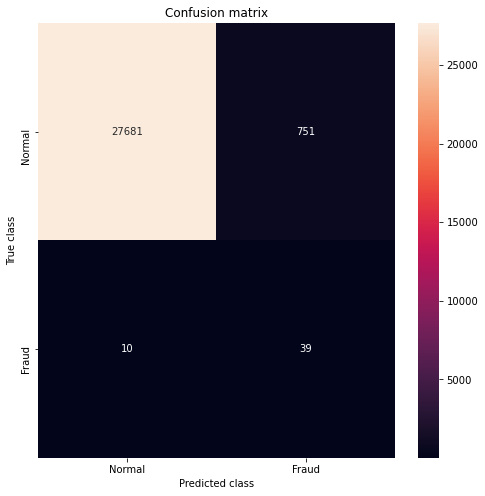

In [22]:
threshold = 0.4
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
print('NN(accuracy score):{}'.format(accuracy_score(error_df.true_class, y_pred)))
print('NN(classification report):\n{}'.format(classification_report(error_df.true_class, y_pred, zero_division=0)))
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [25]:

prn = model.predict(outliers)
mse = np.mean(np.power(outliers - prn, 2), axis=1)
error = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': df['Class']})
error.describe()

,reconstruction_error,true_class
count,49.000000,28481.000000
mean,2.086881,0.001720
std,1.751299,0.041443
min,0.025154,0.000000
25%,0.687656,0.000000
50%,1.994681,0.000000
75%,2.887416,0.000000
max,6.340277,1.000000


NN(accuracy score):0.9997191109862715
NN(classification report):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       1.00      0.84      0.91        49

    accuracy                           1.00     28481
   macro avg       1.00      0.92      0.96     28481
weighted avg       1.00      1.00      1.00     28481



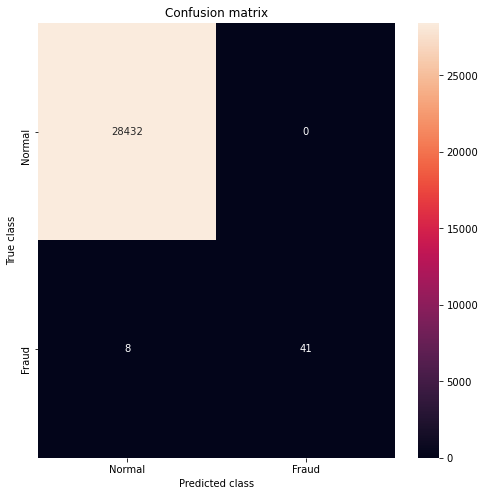

In [28]:
threshold = 0.1
y_pred = [1 if e > threshold else 0 for e in error.reconstruction_error.values]
print('NN(accuracy score):{}'.format(accuracy_score(error.true_class, y_pred)))
print('NN(classification report):\n{}'.format(classification_report(error.true_class, y_pred, zero_division=0)))
conf_matrix = confusion_matrix(error.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

0.8367346938775511